In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings as w
w.filterwarnings('ignore')

In [3]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape


(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Encoding


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    df[column] = le.fit_transform(df[column])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Without loop

In [14]:
df.sex = le.fit_transform(df.sex)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

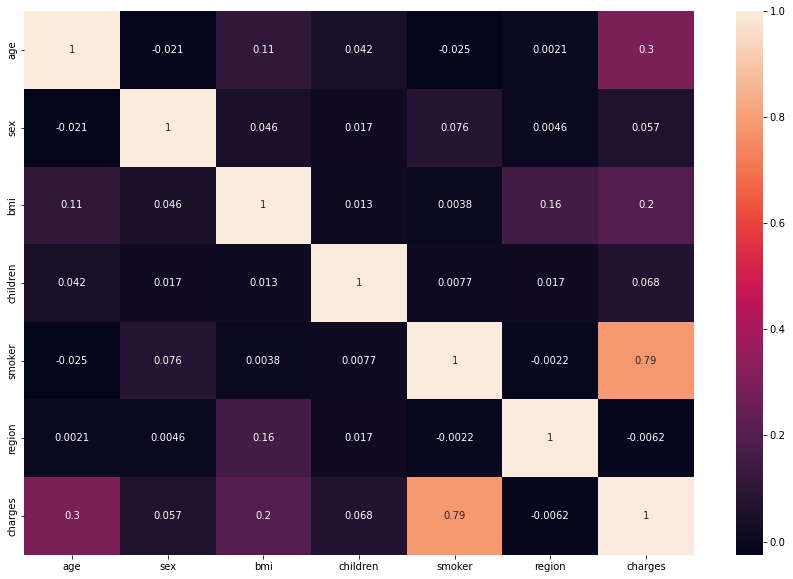

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr() , annot=True)

# Define x and y

In [17]:
x=df.drop('charges',axis=1)
y= df['charges']


In [18]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [19]:
x.shape

(1338, 6)

In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [21]:
y.shape

(1338,)

In [22]:
x.info

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]>

<AxesSubplot:xlabel='sex', ylabel='charges'>

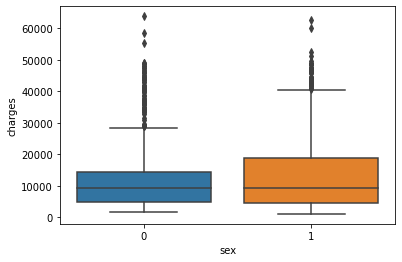

In [23]:
sns.boxplot(x['sex'],y)

# hold out cross validation

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42) 

In [55]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [29]:
xtrain.head()

,age,sex,bmi,children,smoker,region
693,24,1,23.655,0,0,1
1297,28,0,26.510,2,0,2
634,51,1,39.700,1,0,3
1022,47,1,36.080,1,1,2
178,46,0,28.900,2,0,3


In [30]:
ytrain.head()

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
Name: charges, dtype: float64

# Multiple variable Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(xtrain,ytrain)

LinearRegression()

# find out the coef , intercept

In [34]:
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

In [35]:
m=lr.coef_
m

array([  259.870936  ,    48.14518497,   337.05864381,   427.52339986,
       23622.50371905,  -299.04523816])

In [36]:
c=lr.intercept_
c

-12117.149214175588

In [37]:
#y = m1*x1 + m2*x2 + m3*x3 + c
pred=lr.predict([[50,1,26.41,0,0,1]])
#8827.2099
pred

array([9527.2163158])

# Predict the test results

In [38]:
pred = lr.predict(xtest)
print(pred)


[ 8917.54106359  7057.659731   36899.8708097   9546.15877323
 26950.91414625 10756.81129984   110.22869716 17039.89853046
   986.98094539 11318.40928727 27959.29316402  9452.32982265
  5222.10612385 38466.47603466 40340.10507845 37149.4535954
 15259.14589125 35895.17954336  9120.84172439 31442.58115369
  3723.95224278 10051.46909241  2217.99081229  7016.63069487
 11338.01161132 12930.95780971 14408.72962928  6129.47379121
  9917.59150303  2169.52986706  8966.46437456 13123.3402391
  4495.28487533  3386.82377135  4329.78730663 13041.80740785
  1768.87632392  8665.74216929 33280.34641384 32602.75057167
  3700.75706773  4343.42320809 14032.7103358  11545.84902818
  8813.53969858 12062.88158511  5231.42419487  2955.58371562
 35536.42907912  9183.63264624 15891.85804801  2337.51811118
 12367.13541434  1414.32988846 13490.60701704 12602.54262341
  4308.63712233 32184.47042804 13214.87046964 12863.21030069
 14076.04891269 10469.90391052 16336.37459362  7774.84187511
 11802.82508563  4029.3310

In [39]:
lr_score=lr.score(xtest,ytest)
lr_score

0.7668905583460909

In [40]:
lr.score(x,y)

0.750575745785053

# KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:

knr = KNeighborsRegressor(n_neighbors=3)

In [43]:
kn=knr.fit(xtest,ytest)
kn

KNeighborsRegressor(n_neighbors=3)

In [44]:
kpred=knr.predict(xtest)    # prediction
print(kpred)

[ 9370.93426667 15810.4546     28985.1606      9370.93426667
 12703.04488333  4804.69483333  5855.88883333 14333.08555
  7372.70485    10212.6852     13851.52281667  7481.17441667
  9584.13452    22309.73966667 25020.09826667 32159.0694
 22682.6495     31766.09693333  8337.8092     27360.88211667
  9137.95133333  7349.6297     11645.38203333 14187.95481667
 15780.94998    10696.81665    12412.09733333  8691.67781667
 14139.6801      1523.76553333 10381.74131    22813.57473333
  2033.30613333 14545.73188333  2976.6856      7444.13196667
  7279.13586667 12404.40236667 24750.14889333 16596.97443333
 15041.18754667  2386.1045     11543.96756667 12325.92913333
 16336.42313333 11815.415       2493.48366667  4355.30628333
 30615.65263333 16021.40153333 36589.06203333  1523.76553333
 13820.13401333  1846.38395    13992.44895667 14648.98166333
  4040.70286667 38354.96093333 11978.43191667 10451.70751667
 24744.2434      4714.66376667 18069.42749333 12363.05648333
 24902.53747     4004.94406667 

In [45]:
knn_score=knr.score(xtest,ytest)
knn_score

0.4902964875585232

# Accuracy = LR VS KNN

In [46]:
lr_score


0.7668905583460909

In [47]:
knn_score

0.4902964875585232

In [48]:
com=lr_score-knn_score
com

0.2765940707875677

In [49]:
data={
    'Algorithm_name': ['Linear Regression', 'KNN Regressor'],
    'Accuracy': [lr_score, knn_score],
}
data

{'Algorithm_name': ['Linear Regression', 'KNN Regressor'],
 'Accuracy': [0.7668905583460909, 0.4902964875585232]}

In [50]:
ds = pd.DataFrame(data)
ds

,Algorithm_name,Accuracy
0,Linear Regression,0.766891
1,KNN Regressor,0.490296


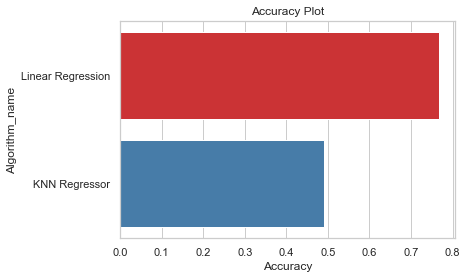

In [51]:
sns.set(style="whitegrid")
sns.barplot(y='Algorithm_name', x='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(8,4)})

# Evaluate the model

In [52]:
from sklearn.metrics import r2_score
r2_score(ytest, pred) *100

76.68905583460909

# Plot the results

Text(0.5, 1.0, 'Value Comparison')

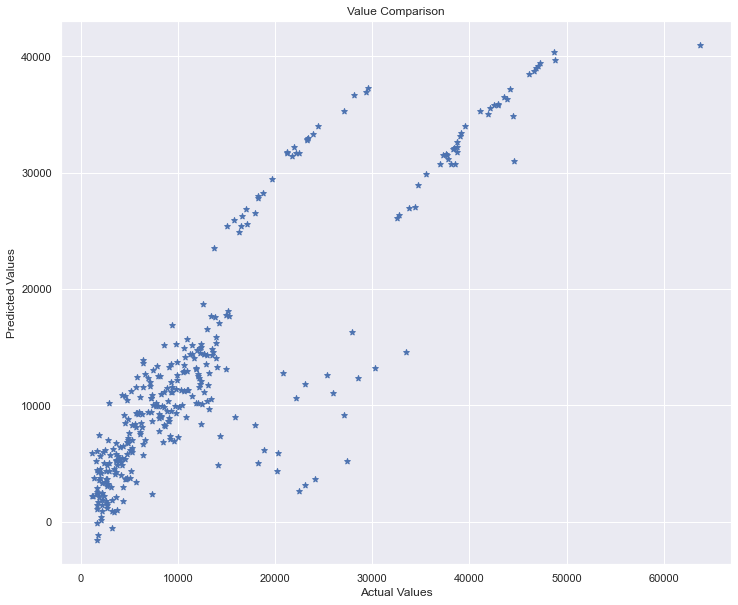

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(ytest, pred, marker='*')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Value Comparison')

# Actual & Predict the values and their Differences

In [54]:
df_pred_y = pd.DataFrame({'Actual Values': ytest, 'Predicted Values': pred, 'Differences': ytest - pred })
df_pred_y

,Actual Values,Predicted Values,Differences
764,9095.06825,8917.541064,177.527186
887,5272.17580,7057.659731,-1785.483931
890,29330.98315,36899.870810,-7568.887660
1293,9301.89355,9546.158773,-244.265223
259,33750.29180,26950.914146,6799.377654
...,...,...,...
342,13217.09450,12761.072583,456.021917
308,11944.59435,14755.059875,-2810.465525
1128,14358.36437,7352.518997,7005.845373
503,32548.34050,26088.980973,6459.359527
